## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [18]:
lang_df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS']).dropna()

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [19]:
lang_df.head()

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,c,83.0
4,2008-08-01 00:00:00,c#,505.0
5,2008-08-01 00:00:00,c++,164.0


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [17]:
lang_df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
lang_df.count()
#lang_df['DATE'].count
#lang_df['POSTS'].count
#lang_df['TAG'].count

DATE     2525
TAG      2525
POSTS    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [24]:
lang_df.groupby('TAG').sum()

<ipython-input-24-e4c7ab848f53>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lang_df.groupby('TAG').sum()


,POSTS
TAG,
assembly,43337.0
c,399577.0
c#,1602676.0
c++,799477.0
delphi,51277.0
go,70917.0
java,1906795.0
javascript,2512044.0
perl,67868.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [22]:
lang_df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [25]:
lang_df['DATE'][1]

'2008-07-01 00:00:00'

In [26]:
print(pd.to_datetime( lang_df['DATE'][1]) )

2008-07-01 00:00:00


In [30]:
type(pd.to_datetime(lang_df['DATE'][1]))
lang_df.DATE = pd.to_datetime(lang_df.DATE)

## Data Manipulation

The easiest way to accomplish this is by using the .pivot() method in Pandas. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells.

In [33]:

test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

reshaped_df = lang_df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
reshaped_df.shape

(183, 14)

In [35]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [37]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [48]:
reshaped_df.count()

TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [49]:
reshaped_df.fillna(0, inplace=True)

In [51]:
reshaped_df.head()
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

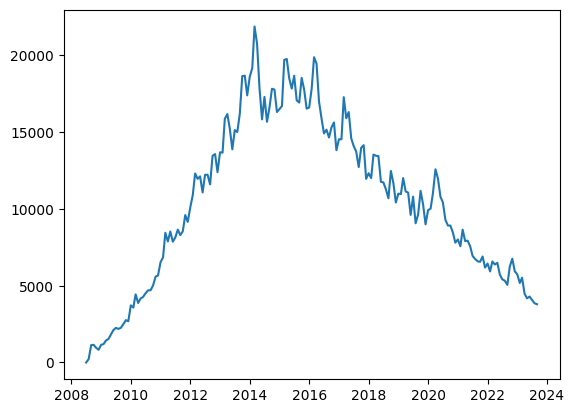

In [57]:
plt.plot(reshaped_df.index, reshaped_df['java'])

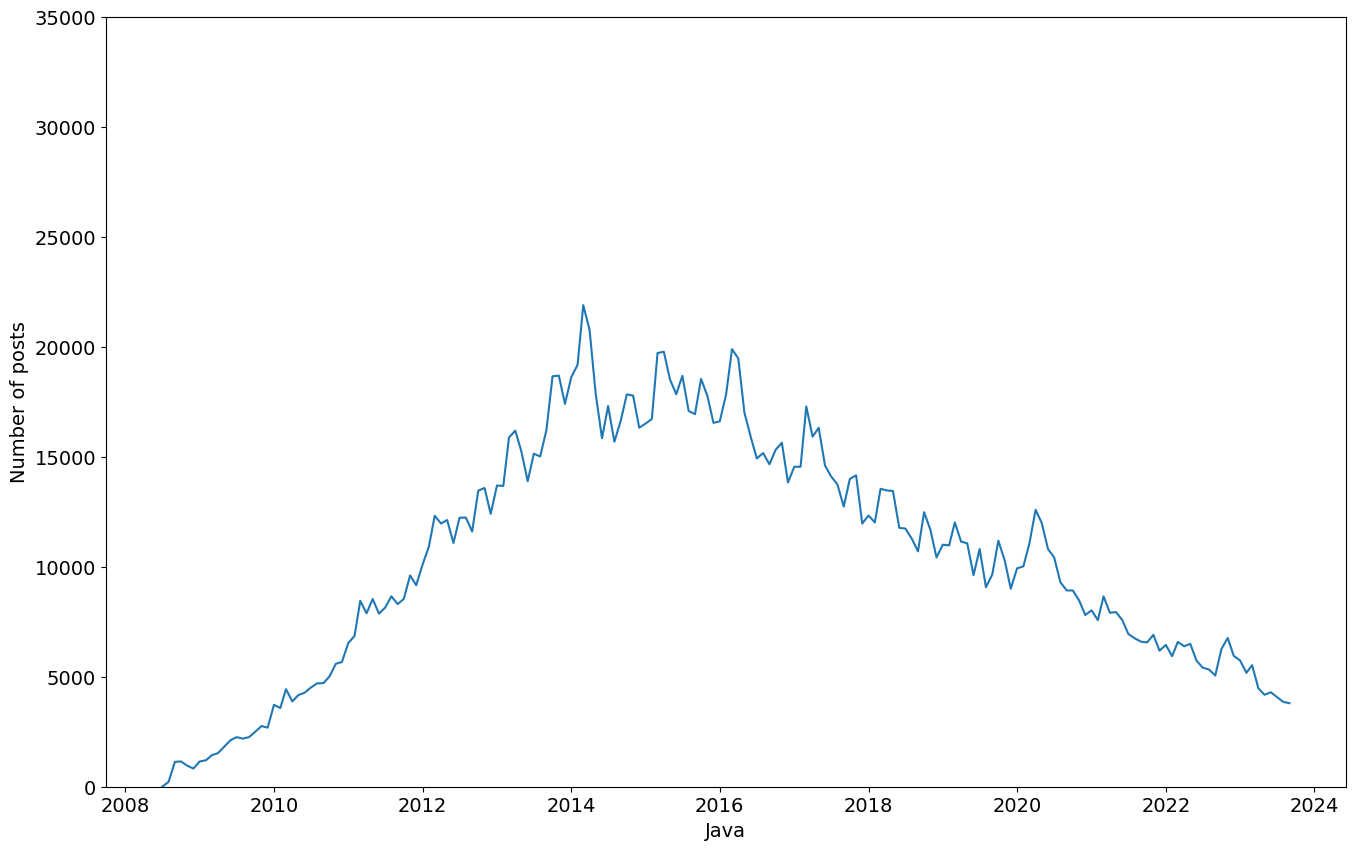

In [66]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Java', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

<Figure size 1600x1000 with 0 Axes>

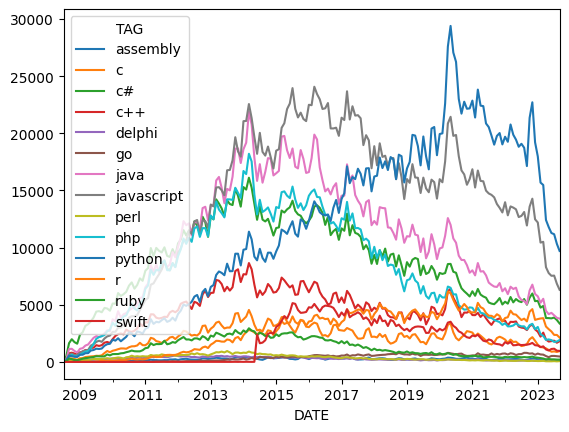

In [72]:
plt.figure(figsize=(16, 10))
reshaped_df.plot()

for col in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[col], linewidth=3, label=reshaped_df[col].name)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

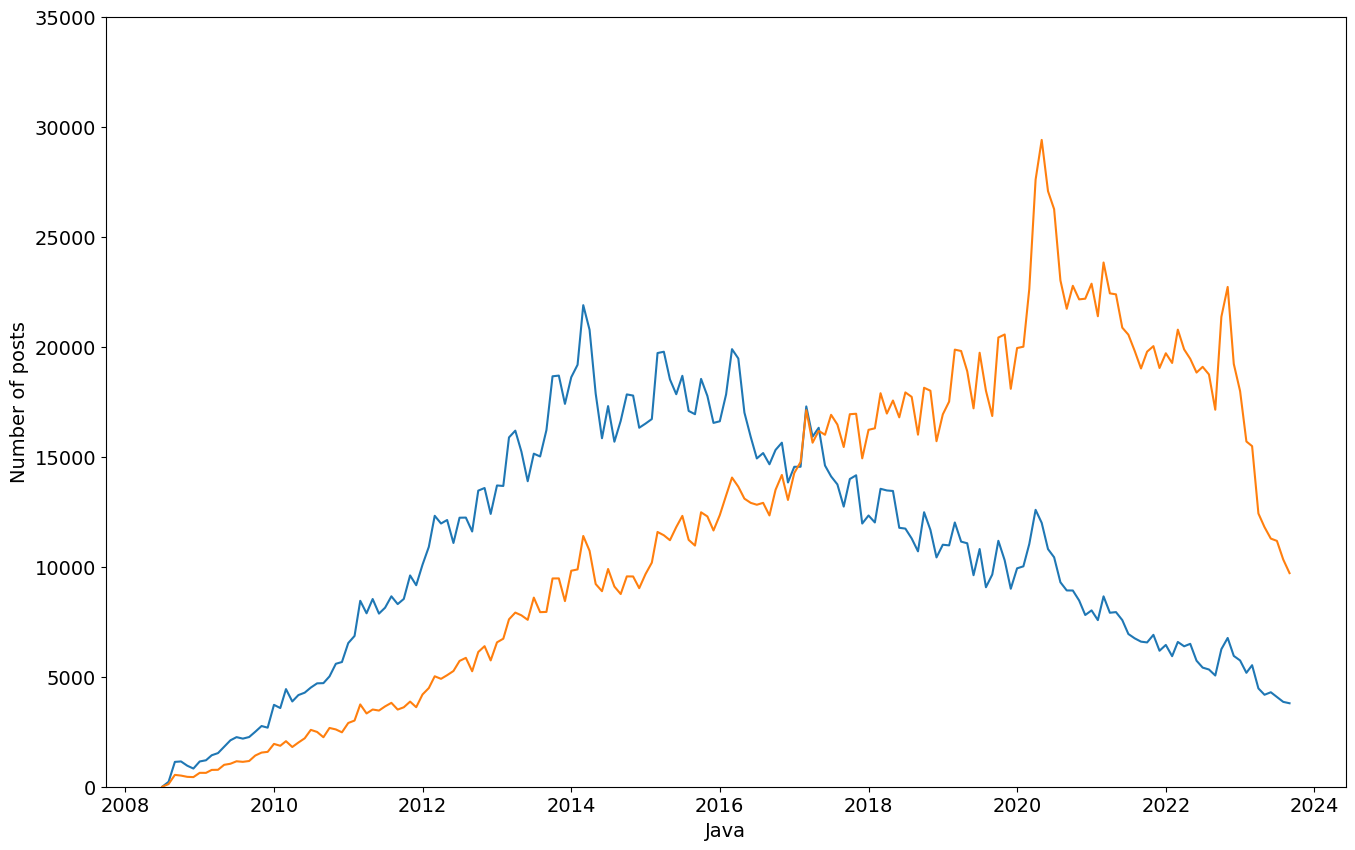

In [67]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Java', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.index, reshaped_df.python)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

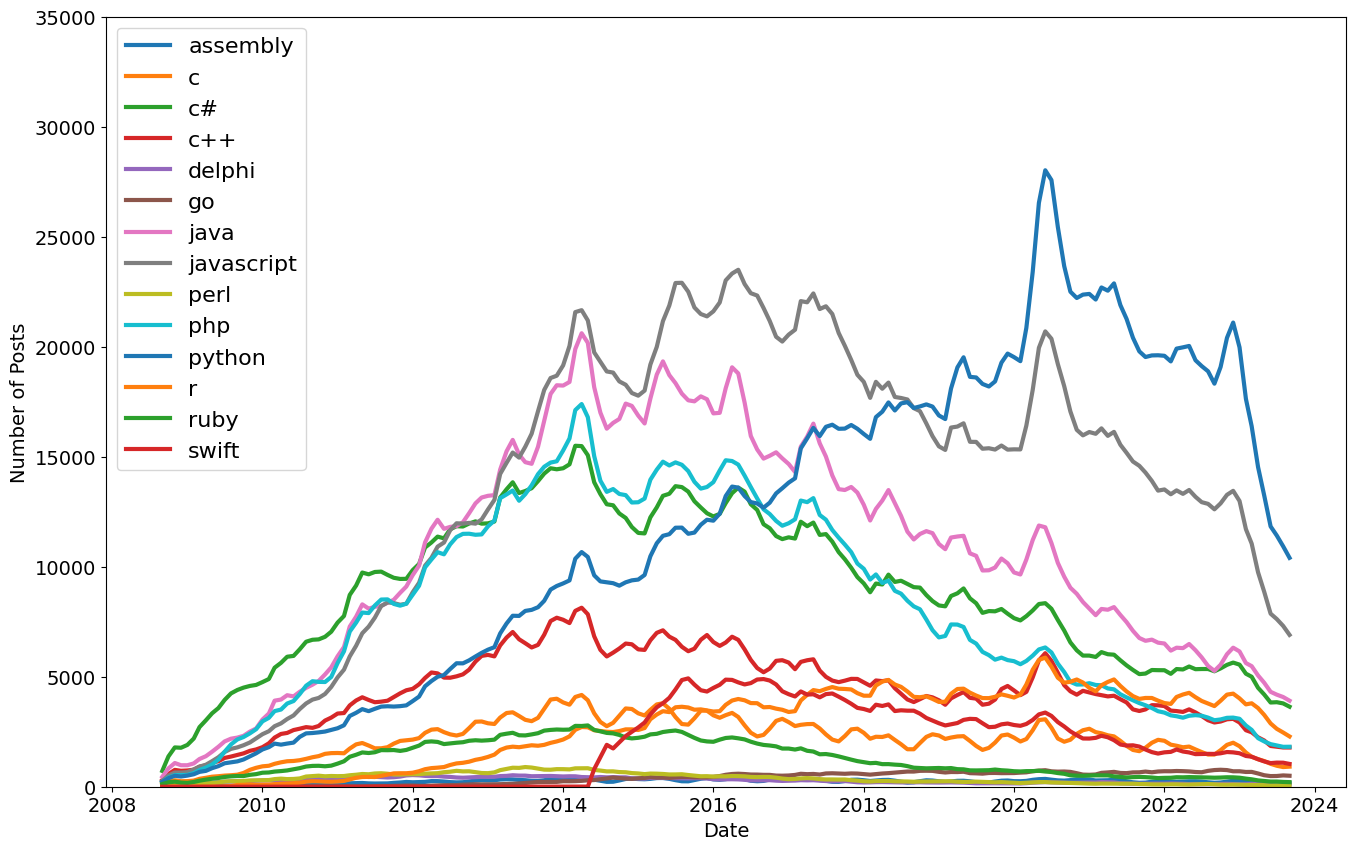

In [77]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

In [78]:
roll_df = reshaped_df.rolling(window=12).mean()

Learning Points & Summary

 Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.